Simple EDA for the new dataset: 
```
output/dataset_worldbank_imputed.csv
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os
import missingno as msno

In [2]:
df = pd.read_csv('output/dataset_worldbank_imputed.csv')

In [3]:
df.shape

(10455, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10455 entries, 0 to 10454
Data columns (total 11 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Country Name                                                                               10455 non-null  object 
 1   Year                                                                                       10455 non-null  int64  
 2   CO2 emissions (metric tons per capita)                                                     10455 non-null  float64
 3   CO2 emissions (kt)                                                                         10455 non-null  float64
 4   Urban population (% of total population)                                                   10455 non-null  float64
 5   Population growth (annual %)                  

In [5]:
df.describe()

,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
count,10455.000000,10455.000000,1.045500e+04,10455.000000,10455.000000,1.045500e+04,1.045500e+04,1.045500e+04,10455.000000,10455.000000
mean,2000.000000,4.324454,8.473830e+05,53.516498,1.602138,1.270182e+06,3.816025e+04,2.726300e+05,2.150809,1923.000694
std,11.832725,6.774820,2.917141e+06,23.428964,1.405863,4.072949e+06,3.734250e+05,8.405047e+05,1.792490,2782.681293
min,1980.000000,0.000000,0.000000e+00,4.339000,-6.766133,0.000000e+00,-1.064283e+06,0.000000e+00,0.000000,0.000000
25%,1990.000000,0.749236,2.240000e+03,33.786500,0.616634,1.233000e+04,-1.610261e+03,3.380000e+03,1.685609,499.574172
50%,2000.000000,2.627933,2.432727e+04,52.824000,1.530234,6.743000e+04,3.585986e+01,1.666920e+04,2.147830,1119.204631
75%,2010.000000,5.985056,1.575450e+05,72.615888,2.540373,2.812050e+05,7.862724e+03,6.444500e+04,2.558416,2615.266287
max,2020.000000,266.483562,3.404105e+07,100.000000,17.512207,4.587385e+07,6.097786e+06,8.174420e+06,103.157895,102629.151305


<AxesSubplot:>

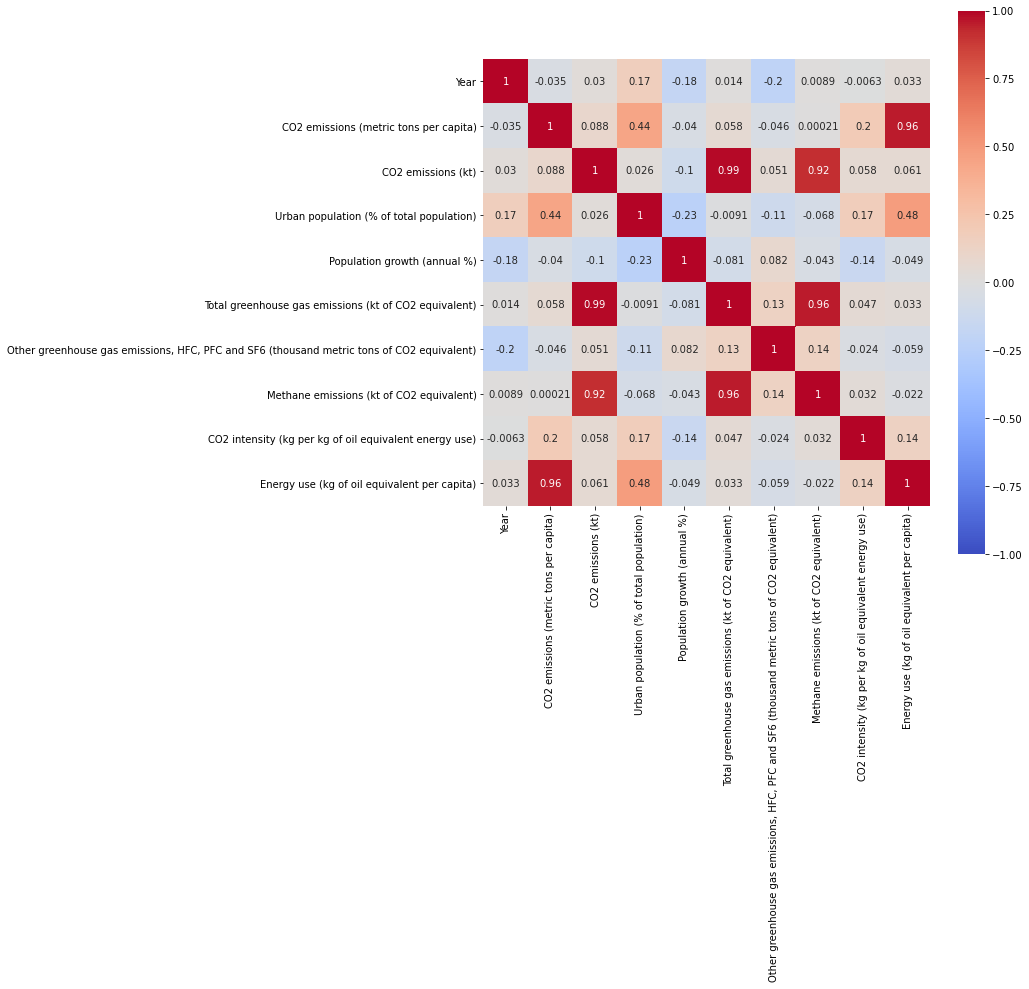

In [6]:
df_corr = df.iloc[:,1:].corr() # exclude country name

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, square=True, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

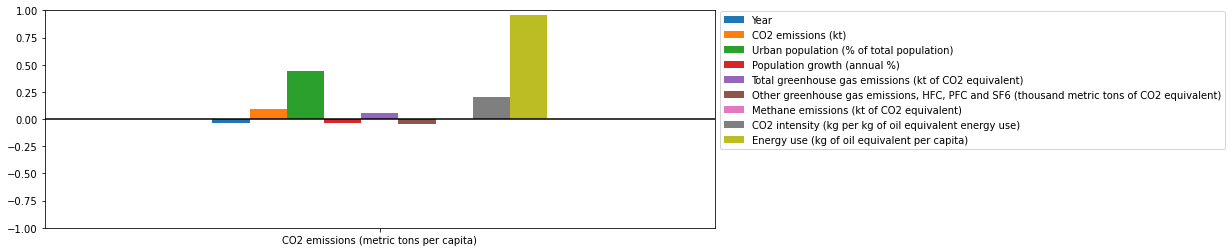

In [7]:
def plot_corr_col(target_col):
    # get the correlation row exclude target variable
    target_col_corr = df_corr.loc[[target_col], df_corr.columns != target_col]

    # plot bar and line
    ax = target_col_corr.plot(kind='bar', figsize=(12, 4), rot=0)
    ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.axhline(y=0, color='black', linestyle='-')
    plt.ylim([-1, 1]) # set limit
    plt.show()

target_col = 'CO2 emissions (metric tons per capita)'
plot_corr_col(target_col)

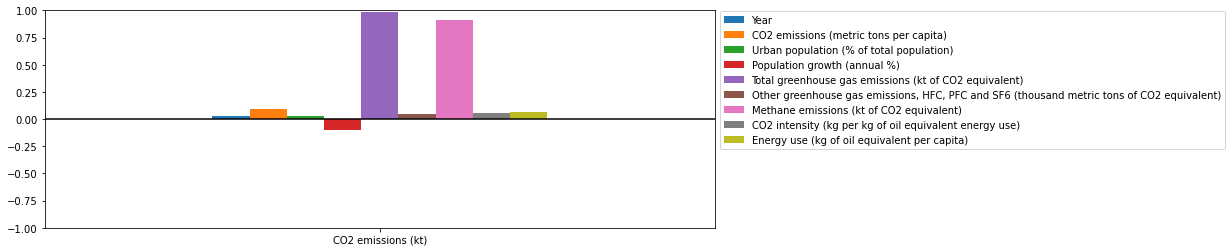

In [8]:
target_col = 'CO2 emissions (kt)'
plot_corr_col(target_col)

In [9]:
df_corr.loc[['CO2 emissions (kt)'], :]

,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
CO2 emissions (kt),0.030354,0.088254,1.0,0.025696,-0.102803,0.988835,0.050856,0.915239,0.057621,0.0613


In [10]:
df_groupby_sum = df.groupby(['Country Name']).sum()
df_groupby_sum = df_groupby_sum.reset_index()
df_groupby_sum

,Country Name,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
0,Afghanistan,82000,7.654970,1.847091e+05,902.745000,106.564281,1.381383e+06,1.849444e+04,9.442349e+05,65.752217,6778.402356
1,Africa Eastern and Southern,82000,45.219495,1.667387e+07,1173.552128,113.654633,5.129128e+07,1.202050e+07,1.619704e+07,71.052366,32094.022568
2,Africa Western and Central,82000,23.911495,5.293437e+06,1477.209530,112.203723,2.562957e+07,4.233442e+06,1.030045e+07,46.891153,25681.351083
3,Albania,82000,68.591310,2.353711e+05,1829.123000,8.066252,5.306326e+05,4.664902e+04,1.738513e+05,86.619867,33507.137509
4,Algeria,82000,121.700094,3.554893e+06,2443.478000,85.507027,5.404108e+06,-4.477767e+03,1.500210e+06,123.387797,44636.670548
...,...,...,...,...,...,...,...,...,...,...,...
250,West Bank and Gaza,82000,191.054164,1.043102e+06,2905.947000,106.960361,3.203843e+06,7.462229e+05,9.715772e+05,89.567564,90149.567516
251,World,82000,169.478952,9.895959e+08,1938.956393,58.052148,1.403164e+09,2.545454e+07,2.734817e+08,100.457734,66537.637510
252,"Yemen, Rep.",82000,28.074839,5.173574e+05,1086.841000,135.810205,9.766129e+05,-1.851768e+04,2.626129e+05,96.872990,13446.452474
253,Zambia,82000,15.753158,1.654136e+05,1598.558000,117.873576,2.785349e+06,1.188425e+06,6.744702e+05,25.980509,27836.644201


In [11]:
# all countries
all_countries = df_groupby_sum['Country Name'].unique().tolist()

# list of non country names
redundant_countries = [ 
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)'
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Small states',
    'South Africa',
    'South Asia',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'World',
    'Upper middle income',
    'Post-demographic dividend',
    'Early-demographic dividend',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Low & middle income',
    'Central Europe and the Baltics',
    'Sub-Saharan Africa',
    'Fragile and conflict affected situations',
    'North America',
    'Central African Republic']

country_list = [country for country in all_countries if country not in redundant_countries]
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 '

In [12]:
print(len(all_countries))
print(len(redundant_countries))
print(len(country_list))

255
48
208


In [13]:
df_country_sum = df_groupby_sum.loc[df_groupby_sum['Country Name'].isin(country_list)]
df_country_sum = df_country_sum.reset_index(drop=True)
df_country_sum

,Country Name,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
0,Afghanistan,82000,7.654970,1.847091e+05,902.745,106.564281,1.381383e+06,1.849444e+04,9.442349e+05,65.752217,6778.402356
1,Albania,82000,68.591310,2.353711e+05,1829.123,8.066252,5.306326e+05,4.664902e+04,1.738513e+05,86.619867,33507.137509
2,Algeria,82000,121.700094,3.554893e+06,2443.478,85.507027,5.404108e+06,-4.477767e+03,1.500210e+06,123.387797,44636.670548
3,American Samoa,82000,227.192157,8.236722e+05,3462.908,55.012243,2.360248e+06,5.116848e+05,7.133678e+05,102.979542,107208.757578
4,Andorra,82000,277.041018,3.419663e+05,3757.288,79.690555,9.138979e+05,1.868478e+05,2.717202e+05,102.019979,128959.013503
...,...,...,...,...,...,...,...,...,...,...,...
203,Virgin Islands (U.S.),82000,242.448707,8.385046e+05,3722.598,9.991858,2.334076e+06,4.894455e+05,7.045432e+05,112.055890,114230.799548
204,West Bank and Gaza,82000,191.054164,1.043102e+06,2905.947,106.960361,3.203843e+06,7.462229e+05,9.715772e+05,89.567564,90149.567516
205,"Yemen, Rep.",82000,28.074839,5.173574e+05,1086.841,135.810205,9.766129e+05,-1.851768e+04,2.626129e+05,96.872990,13446.452474
206,Zambia,82000,15.753158,1.654136e+05,1598.558,117.873576,2.785349e+06,1.188425e+06,6.744702e+05,25.980509,27836.644201


In [14]:
df_country_sum.to_csv('output/dataset_worldbank_countries_sum.csv', index=False)
print('Completed!')

Completed!
